### Example Logistic

### 로지지스틱-회귀분석 (Logistic Regression)

로지스틱 회귀의 목적은 일반적인 [회귀 분석](https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D "회귀 분석")의 목표와 동일하게 [종속 변수](https://ko.wikipedia.org/wiki/%EB%8F%85%EB%A6%BD_%EB%B3%80%EC%88%98%EC%99%80_%EC%A2%85%EC%86%8D_%EB%B3%80%EC%88%98 "독립 변수와 종속 변수")와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 [선형 회귀](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80 "선형 회귀") 분석과 유사하다. 하지만 로지스틱 회귀는 [선형 회귀](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80 "선형 회귀") 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 ([classification](https://en.wikipedia.org/wiki/classification "en:classification")) 기법으로도 볼 수 있다.

- 로짓함수 로지스틱 함수

- **로지스틱 모델 logistic regression**
___

- **odds** (오즈):  odds는 사건이 발생할 확률을 사건 발생하지 않을 확률로 나눈 비율
$$
odds= \frac{p}{1-p}
$$
- **logit**(로짓): $\pm\infty$ 범위에서 클래스에 속할 확률 결정 
$$ 
logit(p) = log\frac{p}{1-p} = \hat\beta_{0}+\hat\beta_{1}x_{1}+\dots + \hat\beta_{d}x_{d}
$$
- **log odds**(로그 오즈): 선형모델의 변형 종속변수로 사용하여 확률에 관한 식으로 
$$
p=\frac{1}{1+e^{-(\hat\beta_{0}+\hat\beta_{1}x_{1}+\dots + \hat\beta_{d}x_{d})}}
$$


 - penalty \
    default = 'l2'
    obtion = {'l1','l2','elasticnet','none'}
- l1_ratio \
    default = none
    0 ~ 1 사의 값으로 elastic 사용시 l1 penalty 의 비율
- C \
    default = '1.0'
    규제의 강도 파라메터, 일반적으로 로그 스케일 형태로 증가 시킴
- class_weight \
    default = None
    label class 에 따라 가중치를 다르게 주기 위해 사용. dict 형태 또는 'balanced' : 전체 dataset 크기 / (class 수 * class 빈도)
- solver \
    default = 'lbfgs'
    {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'} [solover](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions)


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay

from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec


In [39]:
# load data
# df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
# df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Falvanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

from sklearn.datasets import load_wine
X, Y  = load_wine(return_X_y=True)
Y = Y == 2
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [5]:
# check data
# df_wine.info()
# df_wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Falvanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [43]:
# print(df_wine.head())
# print(f" class : {df_wine['Class label'].unique()}")

# X_train
# y_train

array([False, False, False,  True, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False,

In [64]:
# data split
# X_train, X_test, Y_train, Y_test = train_test_split(df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values,
#                                                     stratify=df_wine.iloc[:,0].values,
#                                                     test_size=0.2,
#                                                     random_state=1)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_text_scaled = scaler.fit_transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [66]:
# model define
# log_model = make_pipeline(LogisticRegression(max_iter=1000))

log_model = LogisticRegression(max_iter=1000)
gnb_model = GaussianNB()
svc_model = SVC()


# fit
# log_model.fit(X_train_scaled, Y_train)

log_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

models = [
    ("logistic", log_model),
    ("Naive Bayes", gnb_model),
    ("SVC", svc_model)
]

In [23]:
# print(log_model.predict(X_text_scaled))
# print(log_model.score(X_text_scaled, Y_test))

[2 2 3 1 3 1 3 2 3 3 1 2 2 3 2 2 2 1 1 1 2 1 3 1 2 1 1 2 2 1 3 2 3 3 3 1]
0.9722222222222222


In [24]:
# print(f"predict test data count : {Y_test.shape[0]} ")
# print(f"predict error count : {sum(log_model.predict(X_text_scaled) != Y_test)} ")

predict test data count : 36 
predict error count : 1 


In [25]:
# result = log_model.predict_proba(X_text_scaled)
# result

array([[5.22976098e-02, 9.47013452e-01, 6.88938565e-04],
       [3.96291532e-02, 9.60271476e-01, 9.93703328e-05],
       [7.52378126e-04, 1.62754105e-03, 9.97620081e-01],
       [9.99042694e-01, 6.34125020e-04, 3.23181363e-04],
       [5.71904353e-03, 2.89850787e-04, 9.93991106e-01],
       [7.47037074e-01, 2.14090640e-01, 3.88722863e-02],
       [3.18598918e-03, 1.42470197e-02, 9.82566991e-01],
       [6.48991470e-03, 9.93231982e-01, 2.78103490e-04],
       [1.65284982e-04, 2.96770412e-03, 9.96867011e-01],
       [1.65900662e-01, 2.85239797e-01, 5.48859541e-01],
       [9.97950892e-01, 2.57880863e-04, 1.79122697e-03],
       [4.90145295e-02, 9.39416918e-01, 1.15685527e-02],
       [1.77182037e-02, 9.77454231e-01, 4.82756549e-03],
       [5.80955453e-04, 8.25511653e-02, 9.16867879e-01],
       [9.77666110e-04, 9.99019473e-01, 2.86097191e-06],
       [1.69661938e-02, 9.81573980e-01, 1.45982672e-03],
       [2.97020589e-04, 9.99398665e-01, 3.04314136e-04],
       [9.94823361e-01, 2.59722

In [33]:
# _, ax = plt.subplots()
# ax.plot(result[0])
# RocCurveDisplay.from_estimator(log_model, X_text_scaled, Y_test, ax=ax)
# _ = ax.set_title("ROC curve")

# class 가 3개라서 사용 못함.

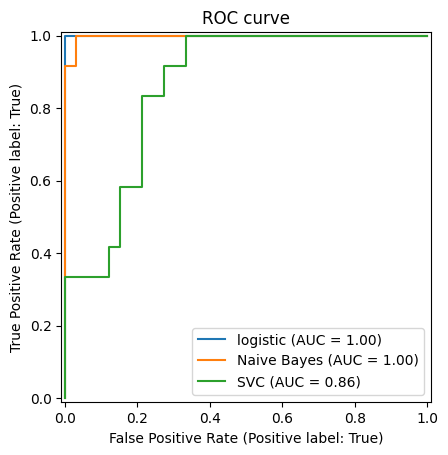

In [67]:
_, ax = plt.subplots()
model_displays = {}
for name, model in models:
    model.fit(X_train, y_train)
    model_displays[name] = RocCurveDisplay.from_estimator(
        model, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")

AttributeError: SVC has none of the following attributes: predict_proba.

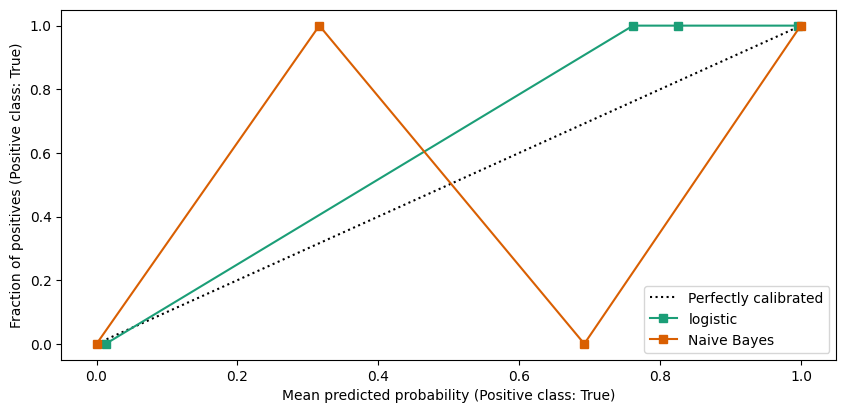

In [68]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2)
colors = plt.get_cmap("Dark2")

plotout = fig.add_subplot(gs[:2])
displays = {}

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        model,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=plotout,
        color=colors(i),
    )
    displays[name] = display
plotout.grid()
plotout.set_title("logistic, SVC")


# Add histogram
grid_positions = [(1, 0), (2, 1)]
for i, (name, _) in enumerate(models):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

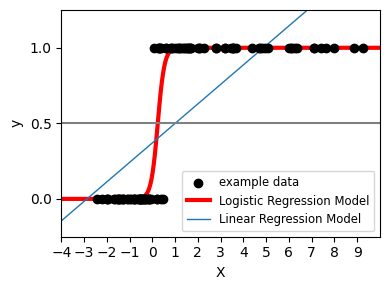

In [69]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()